In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl
import sacc

In [3]:
# Read the fiducial data vector
path = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/source_s16a_lens_dr1/all-fields/dndz'
fname = os.path.join(path, 'summary_statistics_fourier_all_SourcesS16A_LensesDR1_pz_mc_eab_HikageShearSC_DESC_GCandGGL_SC.sacc')
s = sacc.Sacc.load_fits(fname)

In [4]:
# Planck 2018 Cosmology
cosmo = ccl.Cosmology(Omega_c=0.264, Omega_b=0.0493, h=0.6736, sigma8=0.8111, n_s=0.9649)

In [5]:
Om = cosmo['Omega_m']
print('Omega_m = ', Om)
H0 = cosmo['h'] * 100
print('H0 = ', H0)

Omega_m =  0.3133
H0 =  67.36


The lensing kernel or efficiency function essentially describes how much different slices of the universe contribute to the lensing signal at a given redshift.

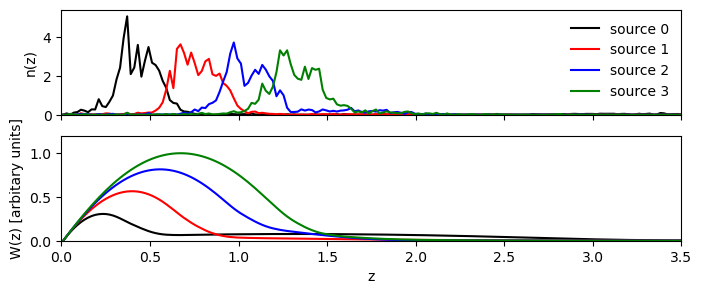

In [32]:
# Initialize a list of matplotlib colors
colors = ['k', 'r', 'b', 'g']

tracer = 'source'

# Initialize a figure for the lensing efficiency
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 3))
for i in np.arange(4):
    if i == 0:
        # Compute the maximum of the lensing efficiency for the highest redshift source bin to normalize the others
        z = s.tracers[f'{tracer}_3'].z
        nz = s.tracers[f'{tracer}_3'].nz
        # print(len(z))
        # print(len(nz))
        if 'source' in tracer:
            chi, W = ccl.tracers.get_lensing_kernel(cosmo = cosmo, dndz = (z, nz), mag_bias = None, n_chi = len(z))
        W_max = np.max(W)

    # Let's compute lensing efficiency for each source bin
    z = s.tracers[f'{tracer}_{i}'].z
    # print(z[0])
    nz = s.tracers[f'{tracer}_{i}'].nz

    if 'source' in tracer:
        chi, W = ccl.tracers.get_lensing_kernel(cosmo = cosmo, dndz = (z, nz), mag_bias = None, n_chi = len(z))
    elif 'lens' in tracer:
        chi, W = ccl.tracers.get_density_kernel(cosmo = cosmo, dndz = (z, nz))
    # print(len(W))
    # Normalize the lensing efficiency
    W = W / W_max

    ax[0].plot(z, nz, color=colors[i], label = f'{tracer} {i}')
    ax[1].plot(z, W, color=colors[i])

plt.xlabel('z')
ax[0].set_ylabel('n(z)')
ax[1].set_ylabel('W(z) [arbitary units]')
ax[0].legend(frameon=False)
ax[0].set_ylim([0.0, 5.4])
ax[1].set_ylim([0.0, 1.2])
plt.xlim([0.0, 3.5])

plt.show()
plt.close()


0.0013644584438263158


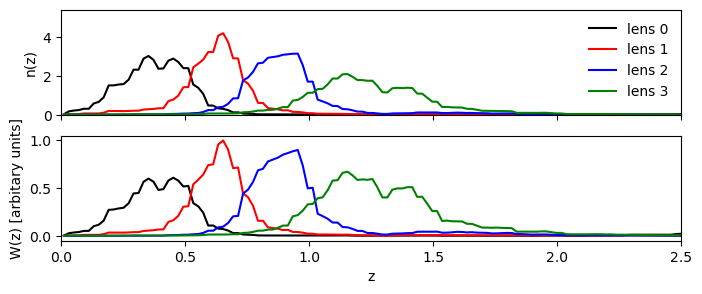

In [44]:
# Initialize a list of matplotlib colors
colors = ['k', 'r', 'b', 'g']

tracer = 'lens'

# Compute the maximum of the lensing efficiency for the highest redshift source bin to normalize the others
z = s.tracers[f'{tracer}_1'].z
nz = s.tracers[f'{tracer}_1'].nz

chi, W = ccl.tracers.get_density_kernel(cosmo = cosmo, dndz = (z, nz))
W_max = np.max(W)
print(W_max)

# Initialize a figure for the lensing efficiency
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 3))

for i in np.arange(4):        
    # Let's compute lensing efficiency for each source bin
    z = s.tracers[f'{tracer}_{i}'].z
    # print(z[0])
    nz = s.tracers[f'{tracer}_{i}'].nz

    if 'source' in tracer:
        chi, W = ccl.tracers.get_lensing_kernel(cosmo = cosmo, dndz = (z, nz), mag_bias = None, n_chi = len(z))
    elif 'lens' in tracer:
        chi, W = ccl.tracers.get_density_kernel(cosmo = cosmo, dndz = (z, nz))
    # print(len(W))
    # Normalize the lensing efficiency
    W = W / W_max

    ax[0].plot(z, nz, color=colors[i], label = f'{tracer} {i}')
    ax[1].plot(z, W, color=colors[i])

plt.xlabel('z')
ax[0].set_ylabel('n(z)')
ax[1].set_ylabel('W(z) [arbitary units]')
ax[0].legend(frameon=False)
ax[0].set_ylim([0.0, 5.4])
plt.xlim([0.0, 2.5])

plt.show()
plt.close()


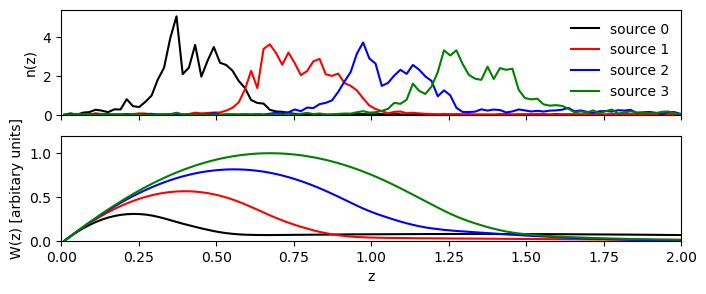

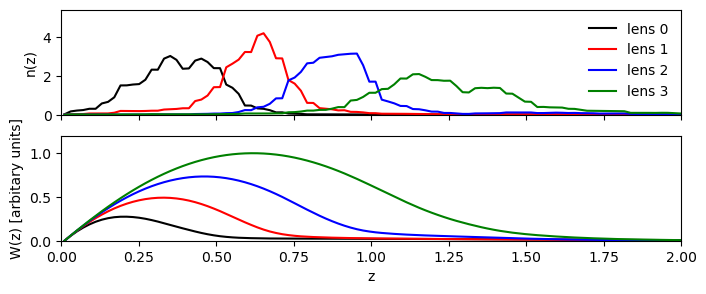

In [48]:
# Initialize a list of matplotlib colors
colors = ['k', 'r', 'b', 'g']

for tracer in ['source', 'lens']:
    # Initialize a figure for the lensing efficiency
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 3))
    for i in np.arange(4):
        if i == 0:
            # Compute the maximum of the lensing efficiency for the highest redshift source bin to normalize the others
            z = s.tracers[f'{tracer}_3'].z
            nz = s.tracers[f'{tracer}_3'].nz
            # print(len(z))
            # print(len(nz))
            chi, W = ccl.tracers.get_lensing_kernel(cosmo = cosmo, dndz = (z, nz), mag_bias = None, n_chi = len(z))
            W_max = np.max(W)

        # Let's compute lensing efficiency for each source bin
        z = s.tracers[f'{tracer}_{i}'].z
        # print(z[0])
        nz = s.tracers[f'{tracer}_{i}'].nz

        chi, W = ccl.tracers.get_lensing_kernel(cosmo = cosmo, dndz = (z, nz), mag_bias = None, n_chi = len(z))
        # print(len(W))
        # Normalize the lensing efficiency
        W = W / W_max

        ax[0].plot(z, nz, color=colors[i], label = f'{tracer} {i}')
        ax[1].plot(z, W, color=colors[i])

    plt.xlabel('z')
    ax[0].set_ylabel('n(z)')
    ax[1].set_ylabel('W(z) [arbitary units]')
    ax[0].legend(frameon=False)
    ax[0].set_ylim([0.0, 5.4])
    ax[1].set_ylim([0.0, 1.2])
    plt.xlim([0.0, 2.0])

    plt.show()
    plt.close()


In [56]:
ell = np.logspace(np.log10(1), np.log10(10000), len(z))
# limber 
k = (ell + 0.5) / chi
a = 1.0 / (1.0 + z)

/tmp/ipykernel_1287512/910826074.py:3: RuntimeWarning: divide by zero encountered in divide
  k = (ell + 0.5) / chi


/tmp/ipykernel_1287512/69355334.py:1: RuntimeWarning: invalid value encountered in divide
  dCelldChi = W ** 2 / chi ** 2 * pk


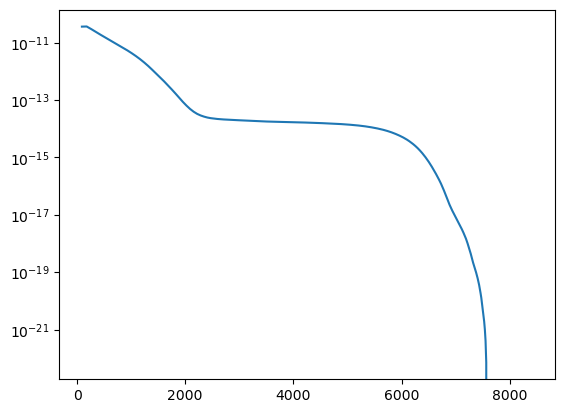

In [67]:
plt.plot(chi, dCelldChi[0,:])
plt.yscale('log')

In [73]:
def dCell_dChi(tracer1='source', tracer2='source', bin1=0, bin2=0, ell):
    # Tracer 1
    z_1 = s.tracers[f'{tracer1}_{bin}'].z
    nz_1 = s.tracers[f'{tracer1}_{bin}'].nz

    chi_1, W_1 = ccl.tracers.get_lensing_kernel(cosmo = cosmo, dndz = (z_1, nz_1), mag_bias = None, n_chi = len(z_1))

    # Tracer 2
    z_2 = s.tracers[f'{tracer2}_{bin}'].z
    nz_2 = s.tracers[f'{tracer2}_{bin}'].nz

    chi_2, W_2 = ccl.tracers.get_lensing_kernel(cosmo = cosmo, dndz = (z_2, nz_2), mag_bias = None, n_chi = len(z_2))

    # limber 
    k = (ell + 0.5) / chi_1
    a = 1.0 / (1.0 + z_1)

    # Compute the power spectrum
    # outputs a matrix, rows are redshift, columns are k
    pk = ccl.nonlin_matter_power(cosmo = cosmo, k = k, a = a)

    # Compute the index associated to a given ell
    idx = np.where(ell == ell)

    dCelldChi = W_1 * W_2 / chi_1 ** 2 * pk[:,idx]

    return dCelldChi

SyntaxError: non-default argument follows default argument (1533208876.py, line 1)

In [82]:
tracer1 = 'source'
tracer2 = 'source'

bin1 = 0
bin2 = 0

name1 = f'{tracer1}_{bin1}'
name2 = f'{tracer2}_{bin2}'

# Tracer 1
z_1 = s.tracers[name1].z
nz_1 = s.tracers[name1].nz

chi_1, W_1 = ccl.tracers.get_lensing_kernel(cosmo = cosmo, dndz = (z_1, nz_1), mag_bias = None, n_chi = len(z_1))

# Tracer 2
z_2 = s.tracers[name2].z
nz_2 = s.tracers[name2].nz

chi_2, W_2 = ccl.tracers.get_lensing_kernel(cosmo = cosmo, dndz = (z_2, nz_2), mag_bias = None, n_chi = len(z_2))

# limber 
k = (ell + 0.5) / chi_1
a = 1.0 / (1.0 + z_1)

# Compute the power spectrum
# outputs a matrix, rows are redshift, columns are k
pk = ccl.nonlin_matter_power(cosmo = cosmo, k = k, a = a)

# Compute the index associated to a given ell
idx = np.where(ell == ell)

dCelldChi = W_1 * W_2 / chi_1 ** 2 * pk[:,idx] 

/tmp/ipykernel_1287512/3367796469.py:23: RuntimeWarning: divide by zero encountered in divide
  k = (ell + 0.5) / chi_1
/tmp/ipykernel_1287512/3367796469.py:33: RuntimeWarning: invalid value encountered in divide
  dCelldChi = W_1 * W_2 / chi_1 ** 2 * pk[:,idx]


In [87]:
dCelldChi.shape

(299, 1, 299)